In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt

## Cancer Tumor Immune System Model

In [5]:
# code

gamma = 200
lambda_c = 1e-2
mu = 0.3
mu_c = 1e-5
mu_T = 0.2
c0 = 1e6
kappa = 3000
KT = 3300
K1 = 0.05 * c0
K2 = 1e5
h = 0.05

t = np.arange(0,100,h)

C = np.zeros(len(t))
M1 = np.zeros(len(t))
M2 = np.zeros(len(t))
T = np.zeros(len(t))

C[0] = 100
M1[0]= 5e4
M2[0]= 0
T[0] = 0

def CM(t, C, M1, M2, T):
    return lambda_c * C * (1 - C / c0) - mu_c * T * C

def M1M(t, C ,M1, M2, T):
    return kappa - gamma * M1 * C / (K1 + C) - mu * M1

def M2M(t, C, M1, M2, T):
    return gamma * M1 * C / (K1 + C) - mu * M2

def TM(t, C, M1, M2, T):
    return KT * M1 / (K2 + M1) - mu_T * T

for i in range(0, len(t) -1):
    C[i+1]  = C[i]  + CM(t[i],  C[i], M1[i], M2[i], T[i]) * h
    M1[i+1] = M1[i] + M1M(t[i], C[i], M1[i], M2[i], T[i]) * h
    M2[i+1] = M2[i] + M2M(t[i], C[i], M1[i], M2[i], T[i]) * h
    T[i+1]  = T[i]  + TM(t[i],  C[i], M1[i], M2[i], T[i]) * h

<function matplotlib.pyplot.show(close=None, block=None)>

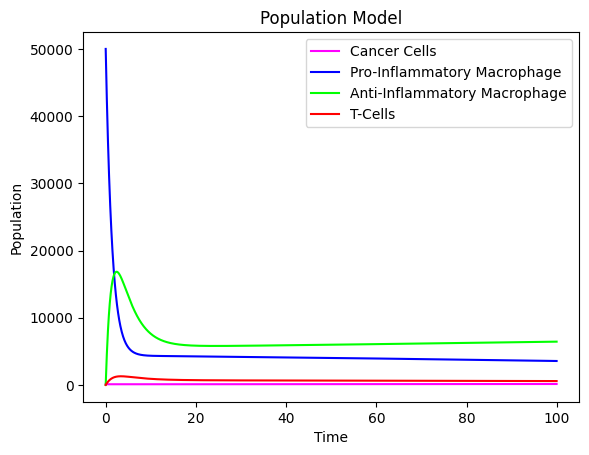

In [6]:
# figure
plt.plot(t, C, color='#FF00FF')
plt.plot(t,M1, color='#0000FF')
plt.plot(t,M2, color='#00FF00')
plt.plot(t, T, color='#FF0000')
plt.legend(["Cancer Cells","Pro-Inflammatory Macrophage","Anti-Inflammatory Macrophage", "T-Cells"], loc='upper right')
plt.title('Population Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.show